In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

In [20]:
# Load the data

def load_data():
    return pd.read_csv(r"C:\Users\rajan\OneDrive\Desktop\Final Project\loan_default_prediction_project.csv")

data= load_data()
data.head()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,56,Male,71266.105175,Employed,Suburban,639,0.007142,27060.188289,Non-Default,13068.330587,18.185533,59
1,46,NaN,37283.054601,Employed,Suburban,474,0.456731,40192.994312,Default,15159.338369,11.727471,69
2,32,Male,69567.036392,Employed,Urban,750,0.329231,25444.262759,Default,6131.287659,17.030462,69
3,60,Female,72016.087392,Employed,Rural,435,0.052482,3122.213749,Non-Default,37531.880251,16.868949,26
4,25,Female,32161.988250,Unemployed,Suburban,315,0.450236,19197.350445,Non-Default,41466.397989,18.891582,66


In [22]:
# missing values
missing_values_count = data.isnull().sum()
print(missing_values_count)

Age                        0
Gender                   208
Income                     0
Employment_Status         94
Location                   0
Credit_Score               0
Debt_to_Income_Ratio       0
Existing_Loan_Balance      0
Loan_Status                0
Loan_Amount                0
Interest_Rate              0
Loan_Duration_Months       0
dtype: int64


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 792 non-null    object 
 2   Income                 1000 non-null   float64
 3   Employment_Status      906 non-null    object 
 4   Location               1000 non-null   object 
 5   Credit_Score           1000 non-null   int64  
 6   Debt_to_Income_Ratio   1000 non-null   float64
 7   Existing_Loan_Balance  1000 non-null   float64
 8   Loan_Status            1000 non-null   object 
 9   Loan_Amount            1000 non-null   float64
 10  Interest_Rate          1000 non-null   float64
 11  Loan_Duration_Months   1000 non-null   int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 93.9+ KB


In [23]:
# Replace missing values in 'Gender' column with the mode
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

# Replace missing values in 'Employment_Status' column with the mode
data['Employment_Status'].fillna(data['Employment_Status'].mode()[0], inplace=True)

In [24]:
# missing values
missing_values_count = data.isnull().sum()
print(missing_values_count)

Age                      0
Gender                   0
Income                   0
Employment_Status        0
Location                 0
Credit_Score             0
Debt_to_Income_Ratio     0
Existing_Loan_Balance    0
Loan_Status              0
Loan_Amount              0
Interest_Rate            0
Loan_Duration_Months     0
dtype: int64


In [25]:
data.head()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,56,Male,71266.105175,Employed,Suburban,639,0.007142,27060.188289,Non-Default,13068.330587,18.185533,59
1,46,Female,37283.054601,Employed,Suburban,474,0.456731,40192.994312,Default,15159.338369,11.727471,69
2,32,Male,69567.036392,Employed,Urban,750,0.329231,25444.262759,Default,6131.287659,17.030462,69
3,60,Female,72016.087392,Employed,Rural,435,0.052482,3122.213749,Non-Default,37531.880251,16.868949,26
4,25,Female,32161.988250,Unemployed,Suburban,315,0.450236,19197.350445,Non-Default,41466.397989,18.891582,66


In [26]:
# Split features and target variable
X = data.drop(columns=["Loan_Status"])  # Features
y = data["Loan_Status"]  # Target variable


In [27]:
print(X.head())

   Age  Gender        Income Employment_Status  Location  Credit_Score  \
0   56    Male  71266.105175          Employed  Suburban           639   
1   46  Female  37283.054601          Employed  Suburban           474   
2   32    Male  69567.036392          Employed     Urban           750   
3   60  Female  72016.087392          Employed     Rural           435   
4   25  Female  32161.988250        Unemployed  Suburban           315   

   Debt_to_Income_Ratio  Existing_Loan_Balance   Loan_Amount  Interest_Rate  \
0              0.007142           27060.188289  13068.330587      18.185533   
1              0.456731           40192.994312  15159.338369      11.727471   
2              0.329231           25444.262759   6131.287659      17.030462   
3              0.052482            3122.213749  37531.880251      16.868949   
4              0.450236           19197.350445  41466.397989      18.891582   

   Loan_Duration_Months  
0                    59  
1                    69  
2 

In [28]:
print(y.head())

0    Non-Default
1        Default
2        Default
3    Non-Default
4    Non-Default
Name: Loan_Status, dtype: object


In [12]:
# Define preprocessing steps for numerical and categorical features here we assigning the values from dataset
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns


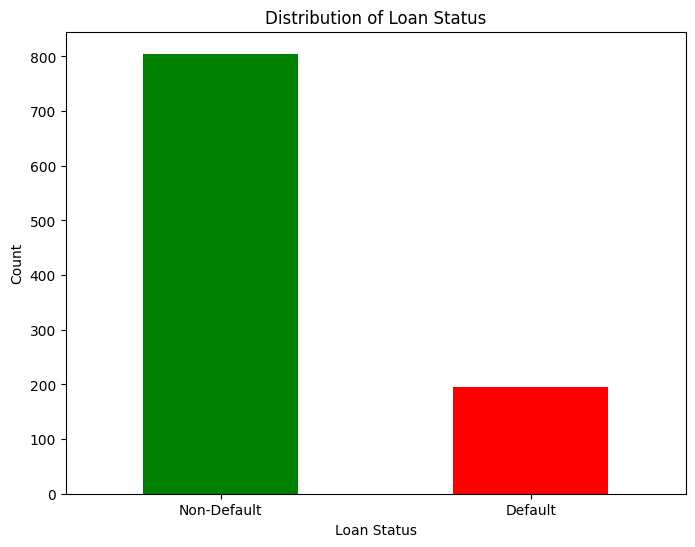

In [15]:
import matplotlib.pyplot as plt

# Count the occurrences of each category in the 'Loan_Status' column
loan_status_counts = y.value_counts()

plt.figure(figsize=(8, 6))
loan_status_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Default', 'Default'], rotation=0)
plt.show()

In [16]:
# Combine numerical and categorical features (add "Location" to categorical features)
categorical_features = categorical_features.append(pd.Index(["Location"]))
print(categorical_features)

Index(['Gender', 'Employment_Status', 'Location', 'Location'], dtype='object')


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define preprocessing steps for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

# Data preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Preprocess the data and convert back to DataFrame
X_encoded = preprocessing_pipeline.fit_transform(X)
columns = numeric_features.tolist() + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))
X_encoded_df = pd.DataFrame(X_encoded, columns=columns)


print(X_encoded_df.head())

        Age    Income  Credit_Score  Debt_to_Income_Ratio  \
0  1.112882  0.429620      0.415800             -1.614349   
1  0.371652 -0.952831     -0.594522             -0.097096   
2 -0.666069  0.360501      1.095471             -0.527378   
3  1.409373  0.460130     -0.833326             -1.461339   
4 -1.184929 -1.161159     -1.568106             -0.119013   

   Existing_Loan_Balance  Loan_Amount  Interest_Rate  Loan_Duration_Months  \
0               0.128246    -1.127667       1.361894              0.980752   
1               1.053379    -0.965809       0.038764              1.565263   
2               0.014413    -1.664643       1.125242              1.565263   
3              -1.558051     0.765981       1.092152             -0.948136   
4              -0.425647     1.070540       1.506549              1.389910   

   Gender_Female  Gender_Male  Employment_Status_Employed  \
0            0.0          1.0                         1.0   
1            1.0          0.0             

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display model evaluation metrics
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)

Accuracy: 0.785

Classification Report:
              precision    recall  f1-score   support

     Default       0.00      0.00      0.00        43
 Non-Default       0.79      1.00      0.88       157

    accuracy                           0.79       200
   macro avg       0.39      0.50      0.44       200
weighted avg       0.62      0.79      0.69       200

